# fvGP comprehensive test

## (0) Setup

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from fvgp.gp import GP
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


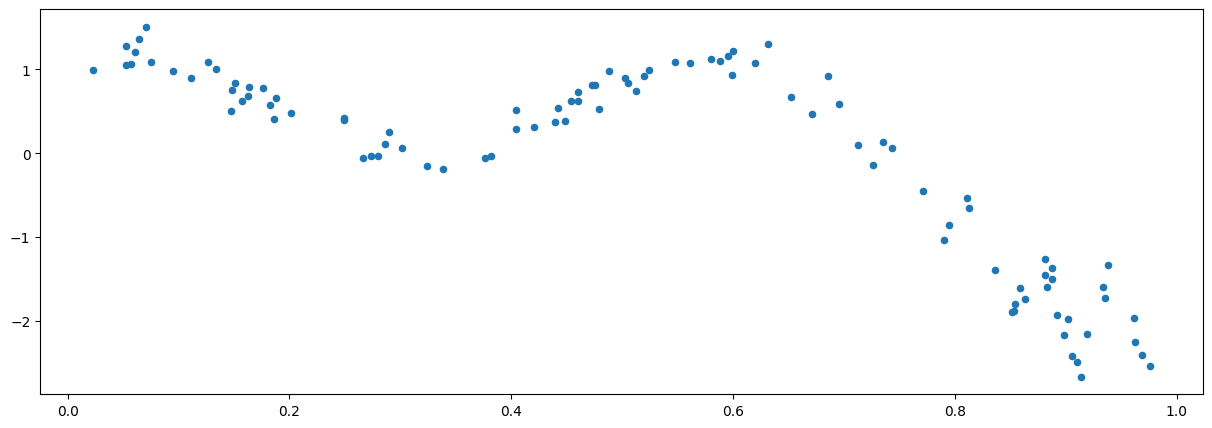

In [5]:
x = np.linspace(0,600,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

#x_data = np.load("x_data.npy") 
x_data = np.random.rand(100)
#y_data = np.load("y_data.npy") 
y_data = f1(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5



plt.figure(figsize = (15,5))

plt.scatter(x_data,y_data, s = 20)

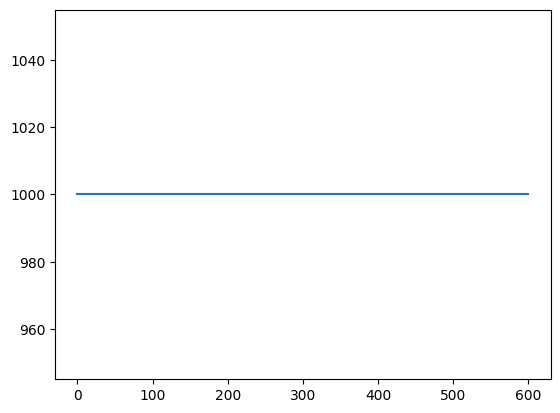

In [6]:
def s(x, my_slope, my_pow, my_intercept):
    o = np.exp(my_slope * (x-my_pow)/600.) + my_intercept
    
    return np.zeros((len(x),1)) + 1000.0


x = np.linspace(0,600,1000)
plt.plot(x,s(x,6.56645290e+00, -2.41247972e+02,1.81827292e+00))
plt.show()


def my_noise(x,hps,obj):
    my_slope = hps[2]
    my_pow = hps[3]
    my_intercept = hps[4]
    my_s = s(x,my_slope,my_pow,my_intercept)
    noise = np.diag(my_s[:,0])
    return noise

#stationary
def skernel(x1,x2,hps,obj):
    d = obj._get_distance_matrix(x1,x2)
    return hps[0] * obj.matern_kernel_diff1(d,hps[1])


#def meanf(x, hps, obj):
#    #print(np.sin(hps[3] * x))
#    return np.sin(hps[3] * x)[:,0]
#plt.figure(figsize = (15,5))
#plt.plot(x,meanf(x, np.array([1.,1.,5.0]), None), color = 'orange', label = 'task1')

Data Plot:


/tmp/ipykernel_2986729/3317229478.py:1: UserWarning: No noise function or measurement noise provided. Noise variances will be set to 1% of mean(y_data).
  my_gp1 = GP(1, x_data,y_data,


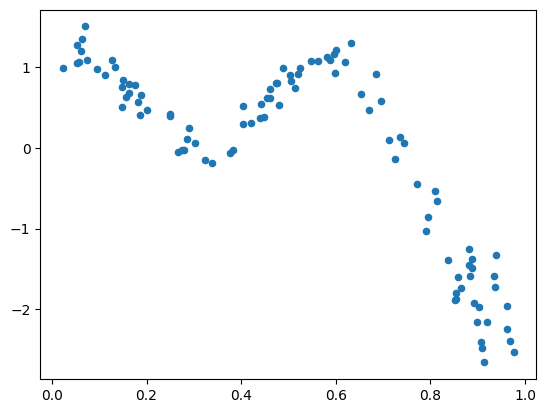

In [7]:
my_gp1 = GP(1, x_data,y_data,
            init_hyperparameters = np.ones((2)),
            #noise_variances=np.ones(y_data.shape) * 10., 
            compute_device='cpu', 
            gp_kernel_function=skernel, 
            gp_kernel_function_grad=None, 
            #gp_mean_function=meanf, 
            gp_mean_function_grad=None,
            #gp_noise_function=my_noise,
            normalize_y=False,
            sparse_mode=False,
            gp2Scale = False,
            store_inv=False, 
            ram_economy=False, 
            args=None,
            )


print("Data Plot:")
plt.scatter(my_gp1.x_data,my_gp1.y_data, s = 20)
plt.show()


hps_bounds = np.array([[0.01,10.],
                       [0.01,10.],
                       #[1.0,10.], #slope
                       #[-300.,300.], #pow
                       #[0.1,100.]
                      ]) #intercept

#my_gp1.update_gp_data(x_data, y_data)
#print("Standard Training")
my_gp1.train(hps_bounds)


#print("Global Training")
#my_gp1.train(hps_bounds, method='global')
#print("hps: ", my_gp1.get_hyperparameters())
#print("Local Training")
#my_gp1.train(hps_bounds, method='local')
#print(my_gp1.get_hyperparameters())
#print("MCMC Training")
#my_gp1.train(hps_bounds, method='mcmc', max_iter=1000)
#print(my_gp1.get_hyperparameters())
#my_gp1.train(hps_bounds, method='hgdl')


In [8]:
#my_gp1.test_log_likelihood_gradient(np.array([100.,100.]))

In [9]:
#my_gp1.train(hps_bounds, method='hgdl', max_iter = 5)

In [10]:
#opt_obj = my_gp1.train_async(hps_bounds)

In [11]:
#my_gp1.update_hyperparameters(opt_obj)
#for entry in opt_obj.optima.list:
#    print(entry)
#    print("")

#my_gp1.entropy(my_gp1.prior_covariance)

In [12]:
#my_gp1.hyperparameters

In [13]:
#my_gp1.V

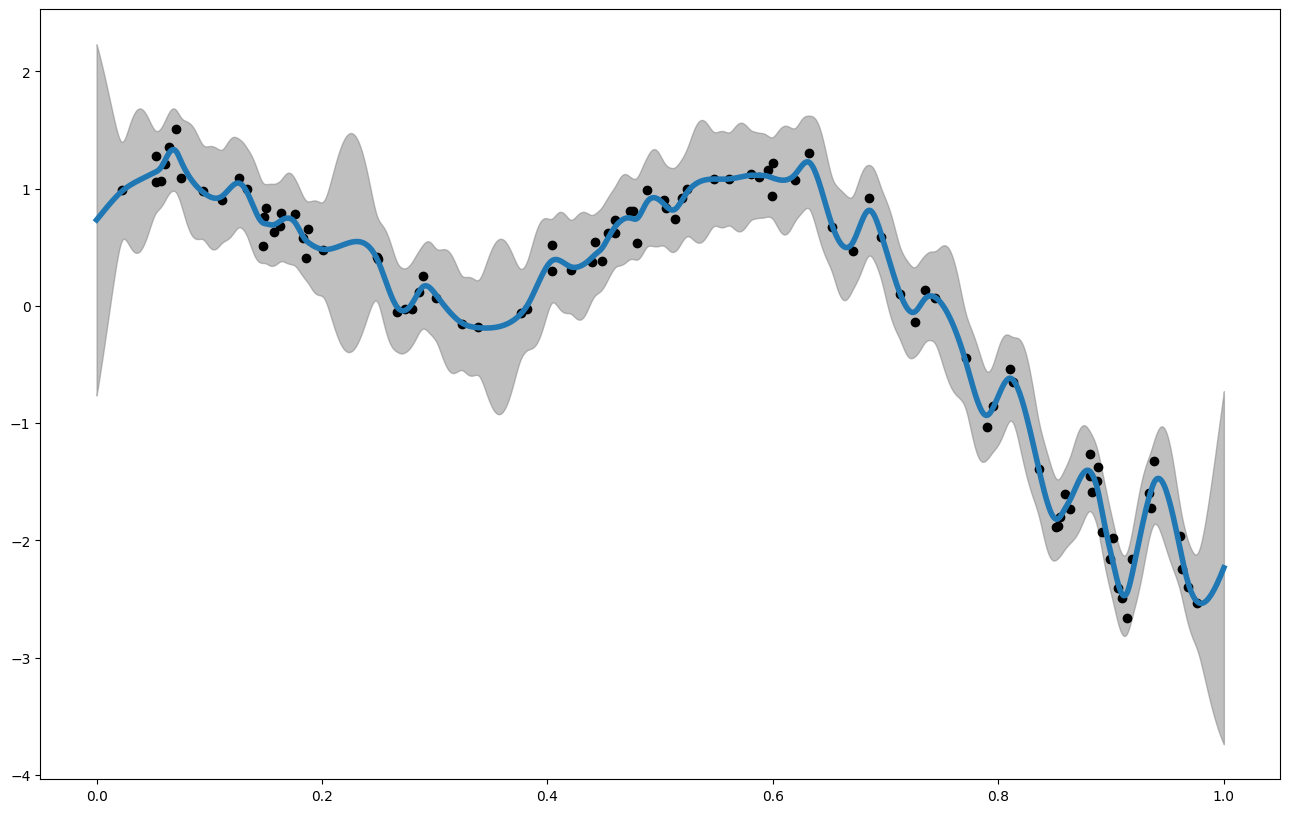

In [14]:
#let's make a prediction
x_pred = np.linspace(0,1,1000)

mean1 = my_gp1.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp1.posterior_covariance(x_pred.reshape(-1,1), variance_only=False, add_noise=True)["v(x)"]
plt.figure(figsize = (16,10))
plt.plot(x_pred,mean1, label = "posterior mean", linewidth = 4)
#plt.plot(x_pred,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x_pred, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data, color = 'black')
#plt.legend(fontsize = 20)

#print("error: ", np.sum(f1(x)-mean1)**2 / len(mean1))

In [15]:
x_pred = np.linspace(0,1,1000)

sig1 = np.zeros((len(x_pred)))
sig2 = np.zeros((len(x_pred)))
for i in range(len(x_pred)):
    print(x_pred[i:i+1].reshape(-1,1))
    sig1[i] = my_gp1._ig(x_pred[i:i+1].reshape(-1,1))
    sig2[i] = my_gp1.shannon_information_gain(x_pred[i:i+1].reshape(-1,1))["sig"]
    #print(sig1[i],sig2[i],entropy_change)
    print("")
sig3 =  my_gp1.shannon_information_gain_vec(x_pred.reshape(-1,1))["sig(x)"]

[[0.]]

[[0.001001]]

[[0.002002]]

[[0.003003]]

[[0.004004]]

[[0.00500501]]

[[0.00600601]]

[[0.00700701]]

[[0.00800801]]

[[0.00900901]]

[[0.01001001]]

[[0.01101101]]

[[0.01201201]]

[[0.01301301]]

[[0.01401401]]

[[0.01501502]]

[[0.01601602]]

[[0.01701702]]

[[0.01801802]]

[[0.01901902]]

[[0.02002002]]

[[0.02102102]]

[[0.02202202]]

[[0.02302302]]

[[0.02402402]]

[[0.02502503]]

[[0.02602603]]

[[0.02702703]]

[[0.02802803]]

[[0.02902903]]

[[0.03003003]]

[[0.03103103]]

[[0.03203203]]

[[0.03303303]]

[[0.03403403]]

[[0.03503504]]

[[0.03603604]]

[[0.03703704]]

[[0.03803804]]

[[0.03903904]]

[[0.04004004]]

[[0.04104104]]

[[0.04204204]]

[[0.04304304]]

[[0.04404404]]

[[0.04504505]]

[[0.04604605]]

[[0.04704705]]

[[0.04804805]]

[[0.04904905]]

[[0.05005005]]

[[0.05105105]]

[[0.05205205]]

[[0.05305305]]

[[0.05405405]]

[[0.05505506]]

[[0.05605606]]

[[0.05705706]]

[[0.05805806]]

[[0.05905906]]

[[0.06006006]]

[[0.06106106]]

[[0.06206206]]

[[0.0630


[[0.6036036]]

[[0.6046046]]

[[0.60560561]]

[[0.60660661]]

[[0.60760761]]

[[0.60860861]]

[[0.60960961]]

[[0.61061061]]

[[0.61161161]]

[[0.61261261]]

[[0.61361361]]

[[0.61461461]]

[[0.61561562]]

[[0.61661662]]

[[0.61761762]]

[[0.61861862]]

[[0.61961962]]

[[0.62062062]]

[[0.62162162]]

[[0.62262262]]

[[0.62362362]]

[[0.62462462]]

[[0.62562563]]

[[0.62662663]]

[[0.62762763]]

[[0.62862863]]

[[0.62962963]]

[[0.63063063]]

[[0.63163163]]

[[0.63263263]]

[[0.63363363]]

[[0.63463463]]

[[0.63563564]]

[[0.63663664]]

[[0.63763764]]

[[0.63863864]]

[[0.63963964]]

[[0.64064064]]

[[0.64164164]]

[[0.64264264]]

[[0.64364364]]

[[0.64464464]]

[[0.64564565]]

[[0.64664665]]

[[0.64764765]]

[[0.64864865]]

[[0.64964965]]

[[0.65065065]]

[[0.65165165]]

[[0.65265265]]

[[0.65365365]]

[[0.65465465]]

[[0.65565566]]

[[0.65665666]]

[[0.65765766]]

[[0.65865866]]

[[0.65965966]]

[[0.66066066]]

[[0.66166166]]

[[0.66266266]]

[[0.66366366]]

[[0.66466466]]

[[0.66566

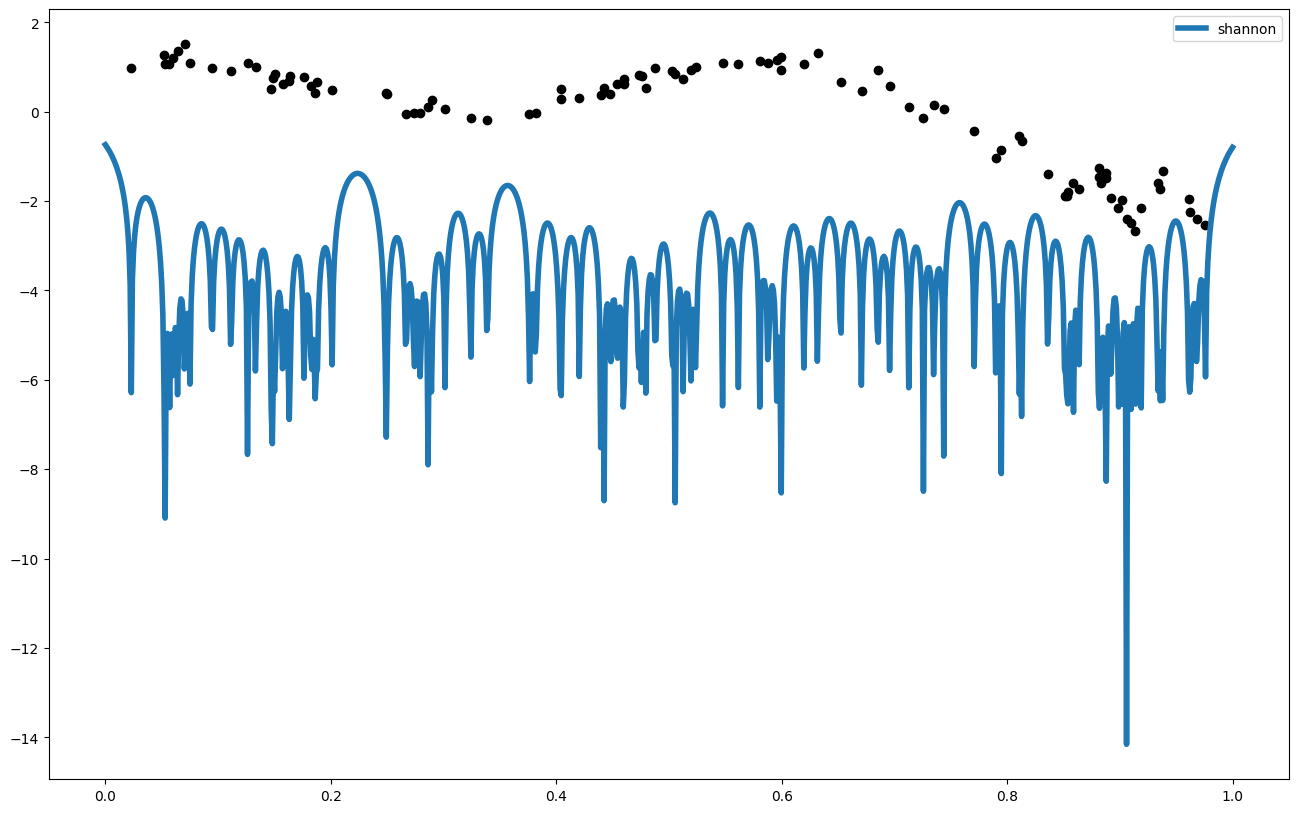

In [17]:
#print(sig3)
plt.figure(figsize = (16,10))
#plt.plot(x_pred,sig1, label = "ig", linewidth = 4)
plt.plot(x_pred,sig3, label = "shannon", linewidth = 4)
plt.scatter(x_data,y_data, color = 'black')
plt.legend()

In [ ]:
res = np.zeros((1000,2))
for i in range(1000):
    S =  my_gp1.posterior_covariance(x_pred.reshape(-1,1))["S"]
    entropy1 = my_gp1.entropy(S)
    print("current entropy before new point: ", )
    new_x = np.random.rand()
    sig = my_gp1.shannon_information_gain(np.array([[new_x]]))
    print("projected entropy decline: ", sig)
    my_gp1.update_gp_data(np.row_stack([my_gp1.x_data,np.array([[new_x]])]),np.append(my_gp1.y_data,f1(new_x)))
    S =  my_gp1.posterior_covariance(x_pred.reshape(-1,1))["S"]
    entropy2 = my_gp1.entropy(S)
    print("entropy after: ", entropy2)
    print("entropy difference vs sig: ", entropy2 - entropy1, sig["sig"])
    res[i] = np.array([entropy2 - entropy1, sig["sig"]])
    print("")

In [ ]:
print(len(my_gp1.x_data))

In [ ]:
x_pred = np.linspace(0,1,1000)

mean1 = my_gp1.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp1.posterior_covariance(x_pred.reshape(-1,1), variance_only=False, add_noise=True)["v(x)"]
plt.figure(figsize = (16,10))
plt.plot(x_pred,mean1, label = "posterior mean", linewidth = 4)
#plt.plot(x_pred,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x_pred, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(my_gp1.x_data,my_gp1.y_data, color = 'black')

In [ ]:
plt.plot(res[:,0])
plt.plot(res[:,1])

In [ ]:
my_gp1.stop_training(opt_obj)
my_gp1.kill_training(opt_obj)

In [ ]:
input_dim = 1
N = 10000
x_data = np.random.rand(N,input_dim)
y_data = f1(x_data)
hps_n = 2

hps_bounds = np.array([[0.1,10.],    ##signal var of stat kernel
                        [0.001,0.02]     ##length scale for stat kernel
                                ])

init_hps = np.random.uniform(size = len(hps_bounds), low = hps_bounds[:,0], high = hps_bounds[:,1])
my_gp2S = GP(1, x_data,y_data,init_hps,  
            gp2Scale = True, gp2Scale_batch_size= 1000
            )



my_gp2S.train(hps_bounds, max_iter = 20, init_hyperparameters = init_hps)
       

In [ ]:
print(my_gp2S.V)


x_pred = np.linspace(0,1,1000)

mean1 = my_gp2S.posterior_mean(x_pred.reshape(-1,1))["f(x)"]
var1 =  my_gp2S.posterior_covariance(x_pred.reshape(-1,1), variance_only=False)["v(x)"]


plt.figure(figsize = (16,10))
plt.plot(x_pred,mean1, label = "posterior mean", linewidth = 4)
plt.plot(x_pred,f1(x_pred), label = "latent function", linewidth = 4)
plt.fill_between(x_pred, mean1 - 3. * np.sqrt(var1), mean1 + 3. * np.sqrt(var1), alpha = 0.5, color = "grey", label = "var")
plt.scatter(x_data,y_data, color = 'black')


## Multi Task

In [ ]:
from fvgp.fvgp import fvGP

x = np.linspace(0,1,1000)
def f1(x):
    return np.sin(5. * x) + np.cos(10. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)

def f2(x):
    return np.sin(5. * x) + np.cos(2. * x) + (2.* (x-0.4)**2) * np.cos(100. * x)


def mkernel(x1,x2,hps,obj):
    d = obj._get_distance_matrix(x1,x2)
    return hps[0] * obj.matern_kernel_diff1(d,hps[1])


x_data = np.random.rand(100)
y_data = np.empty((len(x_data),2))
y_data[:,0] = f1(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
y_data[:,1] = f2(x_data) + (np.random.rand(len(x_data))-0.5) * 0.5
plt.figure(figsize = (15,5))
plt.plot(x,f1(x), color = 'orange', label = 'task1')
plt.plot(x,f2(x), color = 'green',  label = 'task2')
plt.legend()
plt.scatter(x_data,y_data[:,0], s = 20)
plt.scatter(x_data,y_data[:,1], s = 20)

my_gp2 = fvGP(1, 1, 2, x_data,y_data,np.ones((2)),
            noise_variances=None, 
            compute_device='cpu', 
            gp_kernel_function=mkernel, 
            gp_kernel_function_grad=None, 
            #gp_mean_function=meanf, 
            gp_mean_function_grad=None,
            gp_noise_function=None,
            normalize_y=False,
            sparse_mode=False,
            store_inv=True, 
            ram_economy=False, 
            args=None,
            )


print("Data Plot:")

plt.scatter(x_data,y_data[:,0], s = 20)
plt.show()
x_pred = np.linspace(0,1,1000)


hps_bounds = np.array([[0.001,10.],[0.001,10.]])

#my_gp1.update_gp_data(x_data, y_data)
print("Global Training")
my_gp2.train(hps_bounds, method='global')
#print("hps: ", my_gp1.get_hyperparameters())
#print("Local Training")
#my_gp1.train(hps_bounds, method='local')
#print(my_gp1.get_hyperparameters())
#print("MCMC Training")
#my_gp1.train(hps_bounds, method='mcmc', max_iter=1000)
#print(my_gp1.get_hyperparameters())

In [ ]:
my_gp2.input_space_dim


In [ ]:
#let's make a prediction
res = my_gp2.posterior_mean(x_pred.reshape(-1,1), x_out=np.array([[0],[1]]), hyperparameters=np.array([1,1,1,1]))
mean2 = res["f(x)"][0:1000]
var2 =  my_gp2.posterior_covariance(x_pred.reshape(-1,1), x_out=np.array([[0],[1]]))["v(x)"][0:1000]

plt.figure(figsize = (16,10))
plt.plot(x,mean2, label = "posterior mean", linewidth = 4)
plt.plot(x,f1(x), label = "latent function", linewidth = 4)
plt.fill_between(x, mean2 - 3. * np.sqrt(var2), mean2 + 3. * np.sqrt(var2), alpha = 0.5, color = "grey", label = "var")
#plt.plot(x, (f(x)-mean1)**2)
plt.scatter(x_data,y_data[:,0], color = 'black')
#plt.legend(fontsize = 20)
plt.xticks([])
plt.yticks([])
print("error: ", np.sum(f1(x)-mean2)**2 / len(mean2))

# Performance Tests

In [2]:
N = 100
input_dim = 5
from fvgp.fvgp import fvGP


x_data = np.random.rand(N, input_dim)
y_data = np.sin(np.linalg.norm(x_data, axis=1))
x_pred = np.random.rand(10, input_dim)


def test_train_hgdl():
        my_gp2 = GP(input_dim, x_data,y_data,np.array([1, 1, 1, 1, 1, 1]),noise_variances=np.zeros(y_data.shape) + 0.01,
            compute_device="cpu", normalize_y = True, store_inv = True, ram_economy = True)


        my_gp2.train(np.array([[0.01,10],[0.01,10],[0.01,10],[0.01,10],[0.01,10],[0.01,10]]),
                method = "hgdl", tolerance = 0.001, max_iter = 3)


def test_train_hgdl_async():
        my_gp2 = GP(input_dim, x_data,y_data,np.array([1, 1, 1, 1, 1, 1]),noise_variances=np.zeros(y_data.shape) + 0.01,
            compute_device="cpu", normalize_y = True, store_inv = True, ram_economy = True)

        opt_obj = my_gp2.train_async(np.array([[0.01,10],[0.01,10],[0.01,10],[0.01,10],[0.01,10],[0.01,10]]),
                max_iter = 5000)

        my_gp2.update_hyperparameters(opt_obj)
        my_gp2.kill_training(opt_obj)

In [3]:
test_train_hgdl()

/home/marcus/VirtualEnvironments/fvgp_dev/lib/python3.10/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/home/marcus/VirtualEnvironments/fvgp_dev/lib/python3.10/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,
/home/marcus/VirtualEnvironments/fvgp_dev/lib/python3.10/site-packages/scipy/optimize/_minimize.py:565: RuntimeWarning: Method L-BFGS-B does not use Hessian information (hess).
  warn('Method %s does not use Hessian information (hess).' % method,


In [ ]:
test_train_hgdl_async()